# Smart Home - Renewable Energy Design and Prediction

[How Machine Learning Can Transform The Energy Industry](https://towardsdatascience.com/how-machine-learning-can-transform-the-energy-industry-caaa965e282a)

[Data Dictionary](https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
df = pd.read_csv('HomeC.csv')
df.head()

C:\Users\My Computer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


### Datetime Handling

Converting 'object' datatype to 'datetime':

In [3]:
df['time'] = pd.to_datetime(df['time'])
df['time'].head(5)

0   1970-01-01 00:00:01.451624400
1   1970-01-01 00:00:01.451624401
2   1970-01-01 00:00:01.451624402
3   1970-01-01 00:00:01.451624403
4   1970-01-01 00:00:01.451624404
Name: time, dtype: datetime64[ns]

Splitting Datetime into explicit Date and Time:

In [4]:
temp = pd.DatetimeIndex(df['time'])
df['Date'] = temp.date
df['Time'] = temp.time
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time
0,1970-01-01 00:00:01.451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,1970-01-01,00:00:01.451624
1,1970-01-01 00:00:01.451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,1970-01-01,00:00:01.451624
2,1970-01-01 00:00:01.451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,1970-01-01,00:00:01.451624
3,1970-01-01 00:00:01.451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,1970-01-01,00:00:01.451624
4,1970-01-01 00:00:01.451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0,1970-01-01,00:00:01.451624


### Describe

In [5]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
use [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
gen [kW],503910.0,0.076229,0.128428,0.000000,0.003367,0.004283,0.083917,0.613883
House overall [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
Dishwasher [kW],503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767
Furnace 1 [kW],503910.0,0.099210,0.169059,0.000017,0.020233,0.020617,0.068733,1.934083
Furnace 2 [kW],503910.0,0.136779,0.178631,0.000067,0.064400,0.066633,0.080633,0.794933
Home office [kW],503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750
Fridge [kW],503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267
Wine cellar [kW],503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933
Garage door [kW],503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983


### Analysing Energy Data

Dropping unclear data

In [132]:
df[df['use [kW]']== 0]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time
157784,2016-01-03 00:49:44,0.0,0.414433,0.0,0.000017,0.020333,0.079933,0.115783,0.0051,0.027017,...,56.84,1010.3,10.39,0.31,359,0.0,48.76,0.0,2016-01-03,00:49:44


In [133]:
df = df.drop(157784)

Comparing total used and generated energy per day

In [134]:
df1 = df.groupby(['Date'])['use [kW]','gen [kW]'].agg('sum').reset_index()
df1


,Date,use [kW],gen [kW]
0,2016-01-01,70947.811883,3876.899834
1,2016-01-02,69218.821350,6992.013617
2,2016-01-03,49438.172884,7938.917800
3,2016-01-04,95283.612300,8313.396800
4,2016-01-05,73720.802267,6930.678200
5,2016-01-06,71185.332533,4231.182951
6,2016-01-07,3045.187250,129.261200


Visualising Total Energy Use and Total Energy Gen Per Day

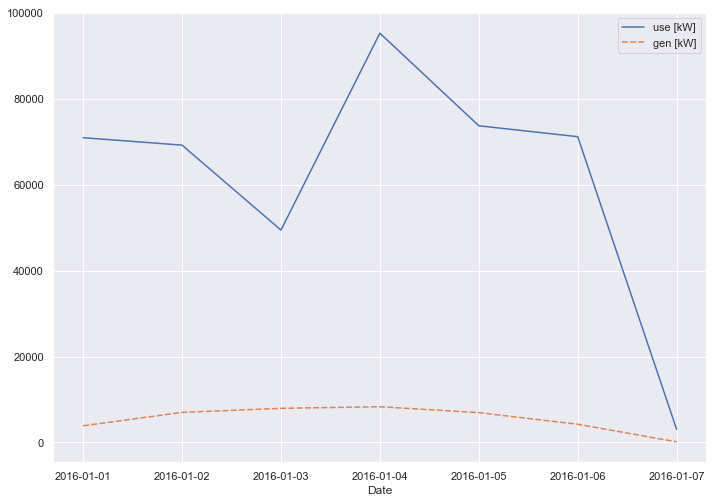

In [136]:
df2 = df1.set_index('Date')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df2)
plt.show()

Visualising the use of energy by specific appliance

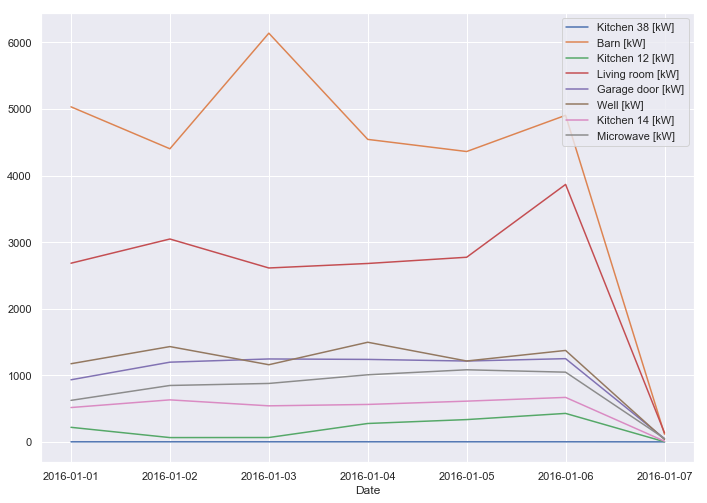

In [137]:
df3 = df.groupby(['Date'])['Kitchen 38 [kW]', 'Barn [kW]', 
                           'Kitchen 12 [kW]', 'Living room [kW]', 'Garage door [kW]', 
                           'Well [kW]','Kitchen 14 [kW]', 'Microwave [kW]'].agg('sum').reset_index()
df3 = df3.set_index('Date')
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df3,dashes=False)
plt.show()

Finding differences bw Use and House Overall

In [6]:
df['use [kW]'][~(df['use [kW]'].isin(df['House overall [kW]']))].reset_index(drop=True)

Series([], Name: use [kW], dtype: float64)

In [7]:
#There are no differences bw 2 columns, therefore, I'll drop one of them
df = df.drop(columns=['House overall [kW]'])

Finding differences bw gen [kW] and Solar [kW]

In [8]:
df[['gen [kW]', 'Solar [kW]']][~(df['gen [kW]'].isin(df['Solar [kW]']))]

,gen [kW],Solar [kW]


In [9]:
#There are no differences bw 2 columns, therefore, I'll drop one of them
df = df.drop(columns=['gen [kW]'])

### Weather

[humidity](https://science.howstuffworks.com/nature/climate-weather/atmospheric/question651.htm)
[visibility](https://en.wikipedia.org/wiki/Visibility)
[Dew_point](https://en.wikipedia.org/wiki/Dew_point)
[Probability_of_precipitation](https://en.wikipedia.org/wiki/Probability_of_precipitation)
[PRECIPITATION INTENSITY](https://theweatherprediction.com/habyhints2/434/)
[wind bearing](http://meteorologytraining.tpub.com/14269/css/14269_55.htm)
[Wind_speed](https://en.wikipedia.org/wiki/Wind_speed)
[Air pressure](https://www.google.com/search?q=highest+and+lowest+air+pressure+ever+recorded&oq=highest+and+lowest+air+pressure+ever+recorded&aqs=chrome..69i57j0.8451j0j4&sourceid=chrome&ie=UTF-8)

Temperature

In [140]:
#converting fahrenheit to celsius
df['temperature [C]'] = (df['temperature'] - 32) * 5/9 

In [141]:
df['temperature [C]'].describe()

count    503909.000000
mean         10.412179
std          10.618791
min         -24.800000
25%           2.094444
50%          10.177778
75%          19.033333
max          34.288889
Name: temperature [C], dtype: float64

Creating DataFrame in order to observe temperature's trends during 7 days

In [142]:
date1 = df['temperature [C]'][df['time'] < pd.Timestamp(date(2016,1,2))]
date2 = df['temperature [C]'][(df['time'] > pd.Timestamp(date(2016,1,1)))&
            (df['time'] < pd.Timestamp(date(2016,1,3)))]
date3 = df['temperature [C]'][(df['time'] > pd.Timestamp(date(2016,1,2)))&
            (df['time'] < pd.Timestamp(date(2016,1,4)))]
date4 = df['temperature [C]'][(df['time'] > pd.Timestamp(date(2016,1,3)))&
            (df['time'] < pd.Timestamp(date(2016,1,5)))]
date5 = df['temperature [C]'][(df['time'] > pd.Timestamp(date(2016,1,4)))&
            (df['time'] < pd.Timestamp(date(2016,1,6)))]
date6 = df['temperature [C]'][(df['time'] > pd.Timestamp(date(2016,1,5)))&
            (df['time'] < pd.Timestamp(date(2016,1,7)))]
date7 = df['temperature [C]'][df['time'] > pd.Timestamp(date(2016,1,6))]

In [143]:
temp = pd.DataFrame({'date1':date1,'date2':date2,'date3':date3,'date4':date4,'date5':date5,
                   'date6':date6,'date7':date7})
temp.describe()

,date1,date2,date3,date4,date5,date6,date7
count,68400.000000,154800.000000,172798.000000,172798.000000,172799.000000,172799.000000,89909.000000
mean,-2.473213,1.893423,10.466336,19.169476,19.556972,9.496761,2.535543
std,6.515660,7.544414,8.241087,6.783837,6.676764,9.329624,5.863350
min,-24.800000,-24.800000,-11.827778,0.027778,-0.983333,-16.677778,-16.677778
25%,-6.044444,-3.172222,4.616667,14.416667,15.100000,2.244444,-0.800000
50%,-2.022222,1.811111,10.050000,19.600000,20.283333,8.805556,2.227778
75%,1.783333,6.633333,16.366667,24.427778,24.405556,16.511111,6.505556
max,13.533333,25.400000,32.416667,34.288889,34.288889,31.216667,19.822222


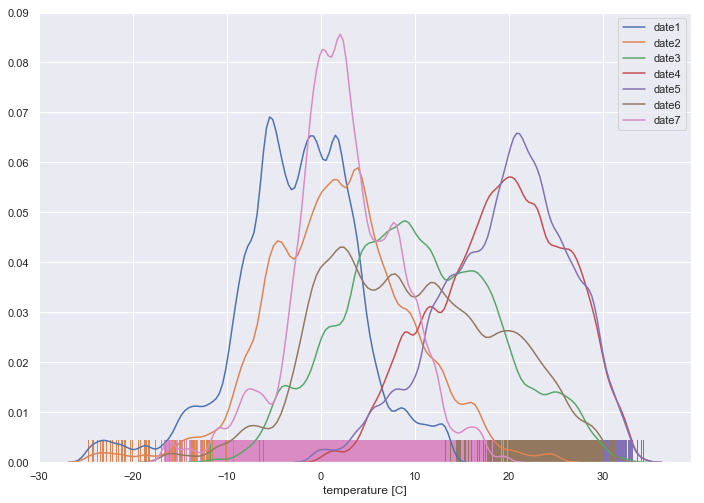

In [144]:
sns.distplot(date1, hist=False, rug=True, label = 'date1')
sns.distplot(date2, hist=False, rug=True, label = 'date2')
sns.distplot(date3, hist=False, rug=True, label = 'date3')
sns.distplot(date4, hist=False, rug=True, label = 'date4')
sns.distplot(date5, hist=False, rug=True, label = 'date5')
sns.distplot(date6, hist=False, rug=True, label = 'date6')
sns.distplot(date7, hist=False, rug=True, label = 'date7')
plt.show()

Icon & Summary

In [11]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [145]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

In [12]:
df.groupby(['Date','icon'])['Time','humidity','visibility','pressure','windSpeed','windBearing','precipIntensity','dewPoint','precipProbability'].agg(['min','max']).reset_index()

Date                 icon             Time                  humidity  \
                                                min              max      min   
0  1970-01-01            clear-day  00:00:01.451624  00:00:01.452127     0.13   
1  1970-01-01          clear-night  00:00:01.451624  00:00:01.452128     0.23   
2  1970-01-01               cloudy  00:00:01.451625  00:00:01.452128     0.46   
3  1970-01-01                  fog  00:00:01.451730  00:00:01.452097     0.94   
4  1970-01-01    partly-cloudy-day  00:00:01.451626  00:00:01.452127     0.20   
5  1970-01-01  partly-cloudy-night  00:00:01.451624  00:00:01.452128     0.34   
6  1970-01-01                 rain  00:00:01.451637  00:00:01.452128     0.43   
7  1970-01-01                 snow  00:00:01.451640  00:00:01.452126     0.40   
8  1970-01-01                 wind  00:00:01.451649  00:00:01.452107     0.24   

        visibility        pressure          windSpeed        windBearing       \
    max        min    max      min      max       min    max         min  max   
0  0.98       2.00  10.00   987.08  1042.44      0.00  21.19           0  359   
1  0.98       2.08  10.00   989.71  1042.46      0.00  20.01           0  359   
2  0.96       2.37  10.00   994.16  1032.39      0.30  16.70           0  355   
3  0.98       0.98   1.89  1002.89  1021.77      0.92   4.87           6  355   
4  0.97       2.38  10.00   987.42  1036.71      0.47  21.60           0  359   
5  0.98       2.14  10.00   992.49  1028.69      0.25  16.51           0  359   
6  0.97       1.32  10.00   986.40  1031.29      0.17  22.91           0  359   
7  0.96       0.27  10.00   996.27  1036.00      0.24  19.18           0  358   
8  0.65       8.66  10.00  1000.60  1017.16     18.16  22.85         207  328   

  precipIntensity         dewPoint        precipProbability        
              min     max      min    max               min   max  
0          0.0000  0.0049   -26.71  74.87              0.00  0.21  
1          0.0000  0.0049   -27.24  73.37              0.00  0.21  
2          0.0000  0.0049    12.41  67.13              0.00  0.21  
3          0.0000  0.0000    27.71  57.40              0.00  0.00  
4          0.0000  0.0048    -6.96  74.90              0.00  0.20  
5          0.0000  0.0049    -0.97  72.99              0.00  0.21  
6          0.0050  0.1910    18.68  75.49              0.21  0.84  
7          0.0008  0.0707    -8.00  30.44              0.01  0.75  
8          0.0000  0.0033    -4.29  53.31              0.00  0.11

By looking at humidity, data indicates that there were mostly dry air during the week

### Wind Generation

Installing Air 40 Wind Turbine 48V

[Product Information](https://au.rs-online.com/web/p/products/9064246?ef_id=Cj0KCQiA2ITuBRDkARIsAMK9Q7PEtp4X7d4XIpbXVpJ5sgYb7B7zGpUqtOwgs7yqaCPO4etNt6_iHScaAsuyEALw_wcB:G:s&s_kwcid=AL!8733!3!99325693714!!!g!1009627796592!&cm_mmc=AU-PLA-DS3A-_-google-_-PLA_AU_EN_Connectors-_-Rf_And_Coaxial_Connectors-_-PRODUCT_GROUP&matchtype=&pla-1009627796592&gclid=Cj0KCQiA2ITuBRDkARIsAMK9Q7PEtp4X7d4XIpbXVpJ5sgYb7B7zGpUqtOwgs7yqaCPO4etNt6_iHScaAsuyEALw_wcB&gclsrc=aw.ds)

[Calculating Electricity Cost](https://www.canstarblue.com.au/electricity/electricity-costs-kwh/)

 [160 watts @ 12.5 m/s wind speed](https://docs.rs-online.com/b4f5/0900766b814766fe.pdf) = 0.16kW @ 12.5m/s

In [148]:
df['windGen [kw]'] = df['windSpeed']* 0.16 / 12.5
df.head()

,time,use [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time,temperature [C],windGen [kw]
0,2016-01-01 05:00:00,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,...,9.18,cloudCover,282,0.0,24.4,0.0,2016-01-01,05:00:00,2.3,0.117504
1,2016-01-01 05:00:01,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,...,9.18,cloudCover,282,0.0,24.4,0.0,2016-01-01,05:00:01,2.3,0.117504
2,2016-01-01 05:00:02,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,...,9.18,cloudCover,282,0.0,24.4,0.0,2016-01-01,05:00:02,2.3,0.117504
3,2016-01-01 05:00:03,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,...,9.18,cloudCover,282,0.0,24.4,0.0,2016-01-01,05:00:03,2.3,0.117504
4,2016-01-01 05:00:04,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,...,9.18,cloudCover,282,0.0,24.4,0.0,2016-01-01,05:00:04,2.3,0.117504


### Hydro power

[Youtube Video](https://www.youtube.com/watch?v=ipEMgHIBrNg)

Installing a 2100l water tank at 9.5m height to capture rainwater and produce hydroelectricity according to drawing

Count total seconds

In [150]:
a = df.groupby(['Date'])['time'].agg(['count']).reset_index()
sum(a['count'])

503909

Sum of total used energy

In [151]:
print(sum(df['use [kW]']))

432839.7404670082


Retrieveing only data of raining date

In [13]:
hydro = df[df['icon']=='rain']
hydro.head()

,time,use [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time
12876,1970-01-01 00:00:01.451637276,0.698400,0.000000,0.020917,0.065083,0.433600,0.004783,0.006817,0.013233,0.000717,...,35.19,1013.68,5.77,0.31,50,0.0064,36.32,0.3,1970-01-01,00:00:01.451637
12877,1970-01-01 00:00:01.451637277,0.695950,0.000000,0.020900,0.063617,0.432950,0.004800,0.006700,0.013200,0.000733,...,35.19,1013.68,5.77,0.31,50,0.0064,36.32,0.3,1970-01-01,00:00:01.451637
12878,1970-01-01 00:00:01.451637278,0.694517,0.000017,0.020850,0.063600,0.431333,0.005150,0.006700,0.013183,0.000733,...,35.19,1013.68,5.77,0.31,50,0.0064,36.32,0.3,1970-01-01,00:00:01.451637
12879,1970-01-01 00:00:01.451637279,0.692683,0.000017,0.020817,0.063550,0.430133,0.004750,0.006717,0.013150,0.000733,...,35.19,1013.68,5.77,0.31,50,0.0064,36.32,0.3,1970-01-01,00:00:01.451637
12880,1970-01-01 00:00:01.451637280,0.693467,0.000000,0.020833,0.064000,0.430000,0.004767,0.006967,0.013167,0.000750,...,35.19,1013.68,5.77,0.31,50,0.0064,36.32,0.3,1970-01-01,00:00:01.451637


Total raining time each day

In [153]:
rain_hours = hydro.groupby(['Date'])['time'].agg(['count']).reset_index()
rain_hours['secs'] = rain_hours['count']
del rain_hours['count']
rain_hours['hours']= rain_hours['secs']/3600
rain_hours

,Date,secs,hours
0,2016-01-01,2784,0.773333
1,2016-01-02,9628,2.674444
2,2016-01-03,7366,2.046111
3,2016-01-04,9796,2.721111
4,2016-01-05,6555,1.820833
5,2016-01-06,6327,1.757500
6,2016-01-07,625,0.173611


There are 24 hours = 84600 seconds a day

Total raining hours of week

In [154]:
print(sum(rain_hours['hours']))

11.966944444444444


Total raining secs of week

In [155]:
print(sum(rain_hours['secs']))

43081


Assumption: 3.5hours to fill up 2100l tank, therefore: 12 hours of rain could produce 7200l of water

Hydro-Power Formular: 

P  (watts)= density(p) * water flow (q)* acceleration of gravity(g) * falling height(m)
P  (watts)= 1000  * water flow (q)     *        9.8                 *  9.5

Pipe diameter = 10cm

Water flow rate:
Q = Velocity /time = (7200/43081)/1000 = 0.000167 m3/s

[Example](https://www.engineeringtoolbox.com/flow-liquid-water-tank-d_1753.html)
[Example1](http://www.softschools.com/formulas/physics/flow_rate_formula/88/)

Water Flow Rate calculation:

In [171]:
print((7200/43081)/1000)

0.00016712703976230823


Hydro-Power calculation:

In [15]:
print('total hydro power:', ((1000*((7200/43081)/1000)*9.8*9.5)/1000)*43081, 'Kw')

total hydro power: 670.32 Kw


In [16]:
print('hydro power/sec: ',(1000*((7200/43081)/1000)*9.8*9.5)/1000, 'Kw')

hydro power/sec:  0.015559527401870896 Kw


In [176]:
def link(df):
    if df['icon'] == 'rain' :
        return ((1000*((7200/43081)/1000)*9.8*9.5)/1000)
    else:
        return 0

df['hydroGen [kw]'] =  df.apply(link, axis = 1)

Total renewable energy generated:

In [177]:
df['Gen [kw]'] = df['hydroGen [kw]'] + df['windGen [kw]'] + df['Solar [kW]']

In [178]:
df.head()

,time,use [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],...,windBearing,precipIntensity,dewPoint,precipProbability,Date,Time,temperature [C],windGen [kw],hydroGen [kw],Gen [kw]
0,2016-01-01 05:00:00,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,...,282,0.0,24.4,0.0,2016-01-01,05:00:00,2.3,0.117504,0.0,0.120987
1,2016-01-01 05:00:01,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,...,282,0.0,24.4,0.0,2016-01-01,05:00:01,2.3,0.117504,0.0,0.120971
2,2016-01-01 05:00:02,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,...,282,0.0,24.4,0.0,2016-01-01,05:00:02,2.3,0.117504,0.0,0.120971
3,2016-01-01 05:00:03,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,...,282,0.0,24.4,0.0,2016-01-01,05:00:03,2.3,0.117504,0.0,0.120987
4,2016-01-01 05:00:04,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,...,282,0.0,24.4,0.0,2016-01-01,05:00:04,2.3,0.117504,0.0,0.120971


In [182]:
sum(df['use [kW]'])

432839.7404670082

In [180]:
sum(df['Gen [kw]'])

81974.94086501801

% of energy saved:

In [184]:
sum(df['Gen [kw]'])/sum(df['use [kW]'])*100

18.93886655984313

In [186]:
#df.to_csv('newhome.csv')